In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import pickle

import numpy as np

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
import dm21cm.physics as phys

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
from matplotlib.ticker import FixedLocator, FixedFormatter
mpl.rc_file(f"{WDIR}/matplotlibrc")

## 0. plotting

In [2]:
label_dict = {
    'dc' : 'DM21CM',
    'dh' : 'DarkHistory',
    '21' : '21cmFAST',
}
color_dict = {
    'dc' : 'r',
    'dh' : 'lightgray',
    '21' : 'k',
}
ls_dict = {
    'dc' : ':',
    'dh' : '--',
    '21' : '-',
}

z_plot_max = 45.
z_plot_min = 5.

## 1. Adiabatic (no injection)

In [83]:
dc_run_name = 'xc_noLX_nos8_noHe'
dh_run_name = 'xc_noHe'
save_name = 'xc_noHe_nos8'

In [80]:
dc_run_name = 'xc_noLX_nos8_noHe_zf001'
dh_run_name = 'xc_noHe_zf001'
save_name = 'xc_noHe_nos8_zf001'

In [86]:
dc_run_name = 'xc_noLX_noHe'
dh_run_name = 'xc_noHe'
save_name = 'xc_noHe'

In [89]:
dc_run_name = 'xc_noLX_sp' # species change term
dh_run_name = 'xc_base'
save_name = 'xc_base_sp'

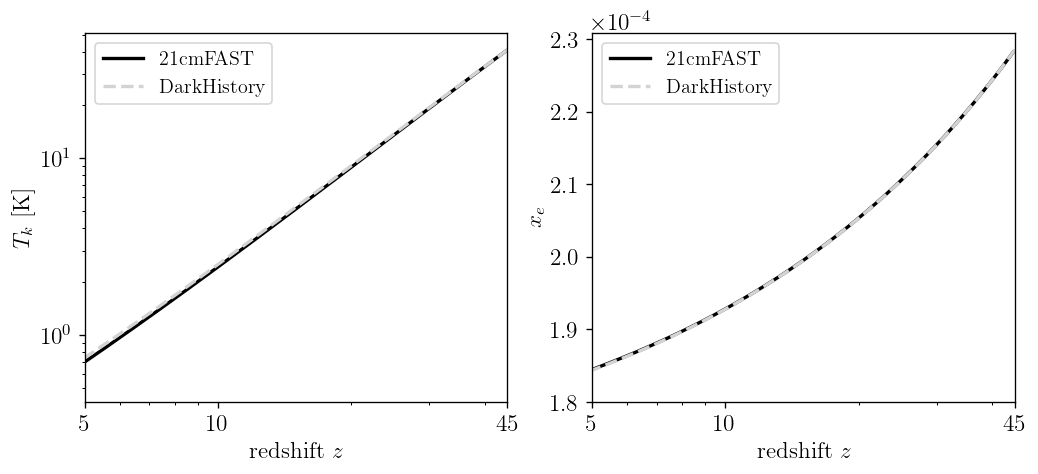

In [90]:
dc_soln = np.load(f'{WDIR}/outputs/dm21cm/{dc_run_name}_records.npy', allow_pickle=True).item()
dh_soln = pickle.load(open(f'{WDIR}/outputs/dh/{dh_run_name}_soln.p', 'rb'))
i_z_st_dh = np.argmin(np.abs(dh_soln['rs']-1 - z_plot_max))

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Tk
ax = axs[0]
ax.plot(dc_soln['z'], dc_soln['T_k'], color=color_dict['21'], label=label_dict['21'], ls=ls_dict['21'], lw=2)
#ax.plot(dc_soln['z'][0], dc_soln['T_k'][0], color=color_dict['21'], marker='+', ms=7, zorder=10)
ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_soln['Tm'][i_z_st_dh:]/phys.kB, color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(xlabel='redshift $z$', ylabel='$T_k$ [K]')
ax.legend()

# x
ax = axs[1]
ax.plot(dc_soln['z'], dc_soln['x_e'], color=color_dict['21'], label=label_dict['21'], ls=ls_dict['21'], lw=2)
#ax.plot(dc_soln['z'][0], dc_soln['x_e'][0], color=color_dict['21'], marker='+', ms=7, zorder=10)
ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_soln['x'][i_z_st_dh:, 0], color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(xlabel='redshift $z$', ylabel='$x_e$')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend()

fig.savefig(f'{save_name}.pdf', bbox_inches='tight')

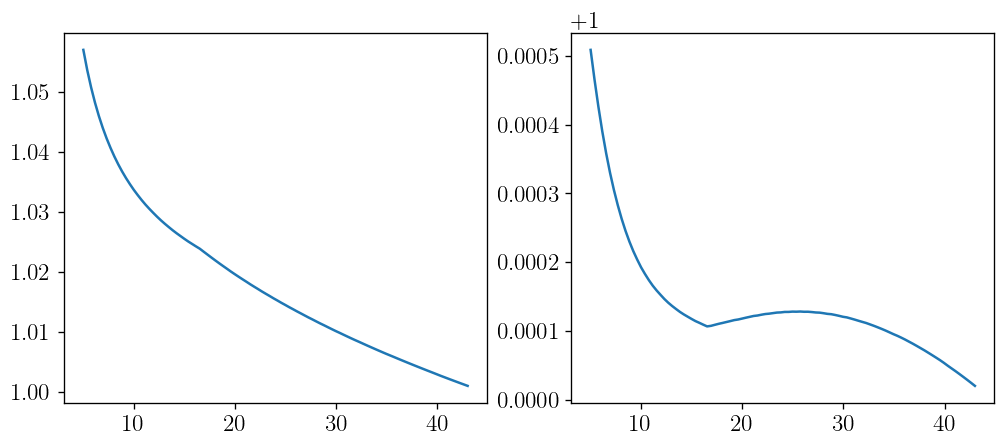

In [91]:
# relative error
z_s = np.linspace(5, 43, 100)
T_21_s = np.interp(z_s, dc_soln['z'][::-1], dc_soln['T_k'][::-1])
T_dh_s = np.interp(z_s, dh_soln['rs'][::-1] - 1, dh_soln['Tm'][::-1]/phys.kB)

x_21_s = np.interp(z_s, dc_soln['z'][::-1], dc_soln['x_e'][::-1])
x_dh_s = np.interp(z_s, dh_soln['rs'][::-1] - 1, dh_soln['x'][::-1, 0])

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(z_s, T_dh_s/T_21_s)
axs[1].plot(z_s, x_21_s/x_dh_s)

## 2. Homogeneous injection

In [3]:
dc_run_name = 'xc_phph_noLX_nos8_noHe_nosp'
dh_run_name = 'xc_phph_noHe'
save_name = 'xc_phph_nos8_noHe_nosp'

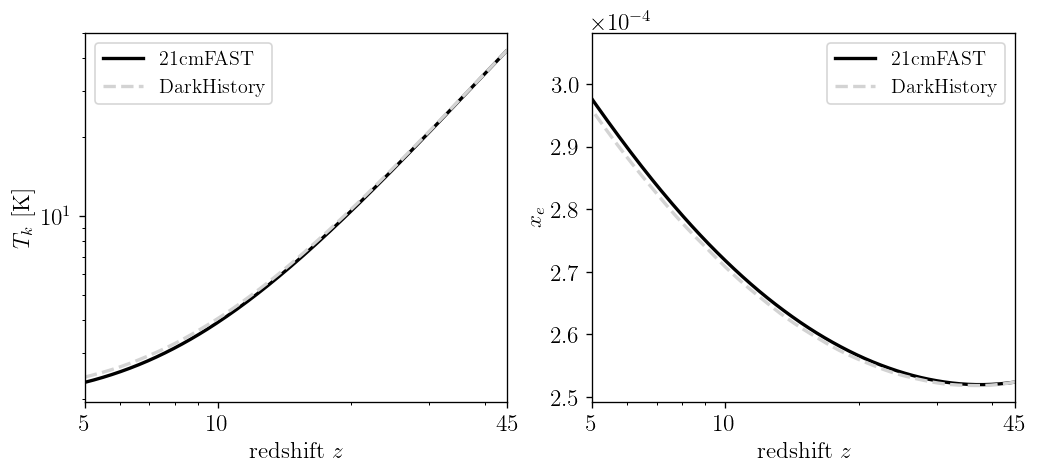

In [6]:
dc_soln = np.load(f'{WDIR}/outputs/dm21cm/{dc_run_name}_records.npy', allow_pickle=True).item()
dh_soln = pickle.load(open(f'{WDIR}/outputs/dh/{dh_run_name}_soln.p', 'rb'))
i_z_st_dh = np.argmin(np.abs(dh_soln['rs']-1 - z_plot_max))

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Tk
ax = axs[0]
ax.plot(dc_soln['z'], dc_soln['T_k'], color=color_dict['21'], label=label_dict['21'], ls=ls_dict['21'], lw=2)
#ax.plot(dc_soln['z'][0], dc_soln['T_k'][0], color=color_dict['21'], marker='+', ms=7, zorder=10)
ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_soln['Tm'][i_z_st_dh:]/phys.kB, color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(xlabel='redshift $z$', ylabel='$T_k$ [K]')
ax.legend()

# x
ax = axs[1]
ax.plot(dc_soln['z'], dc_soln['x_e'], color=color_dict['21'], label=label_dict['21'], ls=ls_dict['21'], lw=2)
#ax.plot(dc_soln['z'][0], dc_soln['x_e'][0], color=color_dict['21'], marker='+', ms=7, zorder=10)
ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_soln['x'][i_z_st_dh:, 0], color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(xlabel='redshift $z$', ylabel='$x_e$')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend()

fig.savefig(f'{save_name}.pdf', bbox_inches='tight')

## 3. Xray

### 3.1 ST homogeneous

In [5]:
dc_run_name = 'xc_xray_noLX_nos8_noHe_nosp'
dc_run_name_2 = 'xc_xrayAllBath_noLX_nos8_noHe_nosp'
dh_run_name = 'xc_xrayST_noHe'
save_name = 'xc_xray_nos8_noHe_nosp'

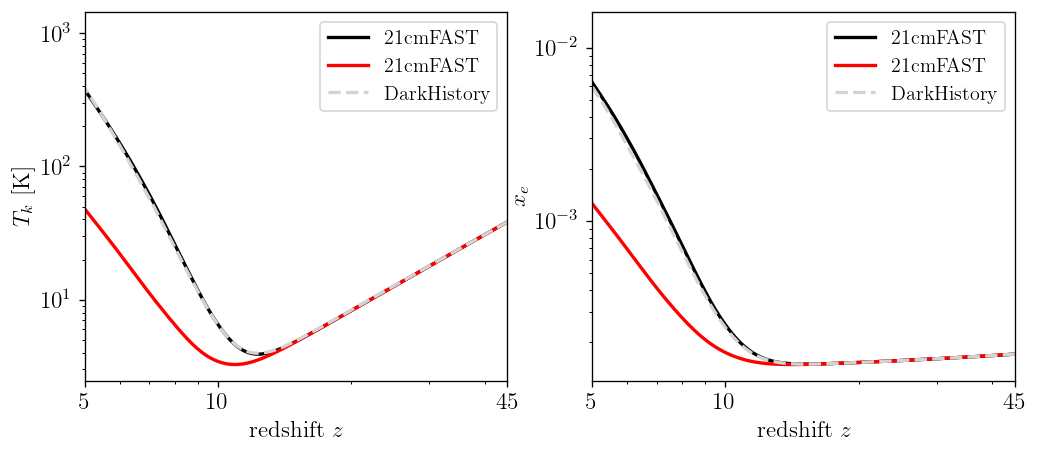

In [6]:
dc_soln = np.load(f'{WDIR}/outputs/dm21cm/{dc_run_name}_records.npy', allow_pickle=True).item()
dc_soln_2 = np.load(f'{WDIR}/outputs/dm21cm/{dc_run_name_2}_records.npy', allow_pickle=True).item()
dh_soln = pickle.load(open(f'{WDIR}/outputs/dh/{dh_run_name}_soln.p', 'rb'))
i_z_st_dh = np.argmin(np.abs(dh_soln['rs']-1 - z_plot_max))

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Tk
ax = axs[0]
ax.plot(dc_soln['z'], dc_soln['T_k'], color=color_dict['21'], label=label_dict['21'], ls=ls_dict['21'], lw=2)
ax.plot(dc_soln_2['z'], dc_soln_2['T_k'], color='r', label=label_dict['21'], ls=ls_dict['21'], lw=2)
#ax.plot(dc_soln['z'][0], dc_soln['T_k'][0], color=color_dict['21'], marker='+', ms=7, zorder=10)
ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_soln['Tm'][i_z_st_dh:]/phys.kB, color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(xlabel='redshift $z$', ylabel='$T_k$ [K]')
ax.legend()

# x
ax = axs[1]
ax.plot(dc_soln['z'], dc_soln['x_e'], color=color_dict['21'], label=label_dict['21'], ls=ls_dict['21'], lw=2)
ax.plot(dc_soln_2['z'], dc_soln_2['x_e'], color='r', label=label_dict['21'], ls=ls_dict['21'], lw=2)
#ax.plot(dc_soln['z'][0], dc_soln['x_e'][0], color=color_dict['21'], marker='+', ms=7, zorder=10)
ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_soln['x'][i_z_st_dh:, 0], color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(xlabel='redshift $z$', ylabel='$x_e$')

#ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend()

fig.savefig(f'{save_name}.pdf', bbox_inches='tight')